In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("./data1.csv")

Данные представляют собой характеристики мобильных телефонов, разделенные по диапазону цен.

некоторые признаки, которые могут быть непонятны

1) battery_power - ёмкость 

2) blue - блютуз есть/нет

3) clock_speed - скорость процессора

4) fc - разрешение фронтальной камеры

5) int_memory - объем внутренней памяти

6) m_dep - рамки экрана

7) pc - разрешение основной камеры




In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Text(0.5, 1.0, 'Распределение зависимой переменной')

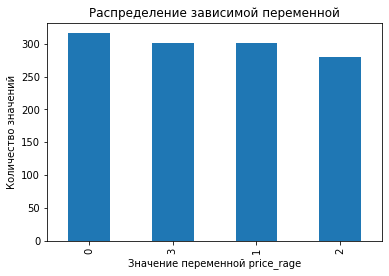

In [4]:
from sklearn.model_selection import train_test_split
x_tr, x_ts = train_test_split(data,test_size = 0.4,random_state=1)
x_train = (x_tr.drop(["price_range"],axis=1) - np.min(x_tr.drop(["price_range"],axis=1)))/(np.max(x_tr.drop(["price_range"],axis=1) - np.min(x_tr.drop(["price_range"],axis=1)) ))
x_test = (x_ts.drop(["price_range"],axis=1) - np.min(x_ts.drop(["price_range"],axis=1))) / (np.max(x_ts.drop(["price_range"],axis=1))-np.min(x_ts.drop(["price_range"],axis=1)))
y_train = x_tr["price_range"].values
y_test = x_ts["price_range"].values
x_tr['price_range'].value_counts().plot(kind='bar')
plt.xlabel('Значение переменной price_rage')
plt.ylabel('Количество значений')
plt.title('Распределение зависимой переменной')

Text(0.5, 1, 'Correlation ')

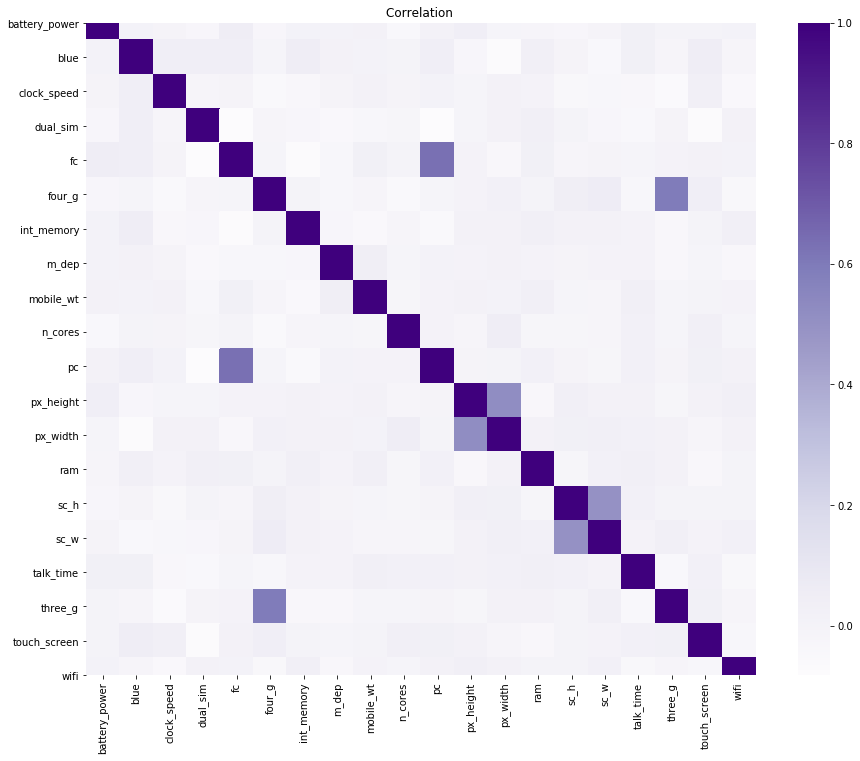

In [5]:

corr=x_train.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

# F1_score(average=[micro, macro, weighted]), дисбаланс классов

По поводу параметра $\textbf{average}$ в функции $\textbf{f1_score}$:

- weighted - вычисляет оценку f1 для каждого класса независимо, но при сложении использует веса, которые зависят от размер класса. $\textbf{F1_{class1} * W_{1} + F1_{class2} * W_{2} + ... + F1_{classN} * W_{N}}$.

- micro - вычисляет оценку не учитывая баланс классов. $\textbf{F1_{class1 + class2 + class3}}$.

- macro - вычисляет F1, разделенный по классу, но не используя веса. $\textbf{F1_{class1} + ... + F1_{classN}}$.

При дисбалансе классов лучше всего использовать $\textbf{macro}$. 

Так как у нас нет явного дисбаланса, то на результат работы F1_score этот параметр сильно не повлият (проверил). Дисбаланс wine проверим в соответствующем разделе.

Применим метод SVM с различными ядрами (линейное, полиномиальное, сигмоид, RBF-ядро(сеть радиальных базичных функций))

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
svm_l=SVC(kernel = "linear")
svm_l.fit(x_train,y_train)
print("train accuracy:",svm_l.score(x_train,y_train))
print("test accuracy:",svm_l.score(x_test,y_test))
f1_score(y_test, svm_l.predict(x_test), average='macro') 

train accuracy: 0.9533333333333334
test accuracy: 0.92625


0.9270607829784884

In [7]:
svm_p=SVC(kernel = "poly") #gamma: 1/(n_features * X.var ()), по умолчанию 1/n_features (признаки) x_var дисперсия
svm_p.fit(x_train,y_train)
print("train accuracy:",svm_p.score(x_train,y_train))
print("test accuracy:",svm_p.score(x_test,y_test))
f1_score(y_test, svm_p.predict(x_test), average='macro')

train accuracy: 0.445
test accuracy: 0.40125


0.33318393476029773

In [8]:
svm_s=SVC(kernel = "sigmoid")
svm_s.fit(x_train,y_train)
print("train accuracy:",svm_s.score(x_train,y_train))
print("test accuracy:",svm_s.score(x_test,y_test))
f1_score(y_test, svm_s.predict(x_test), average='macro')

train accuracy: 0.8158333333333333
test accuracy: 0.7825


0.7884888240275374

In [9]:
svm_rbf=SVC(kernel = "rbf")
svm_rbf.fit(x_train,y_train)
print("train accuracy:",svm_rbf.score(x_train,y_train))
print("test accuracy:",svm_rbf.score(x_test,y_test))
f1_score(y_test, svm_rbf.predict(x_test), average='macro')

train accuracy: 0.8975
test accuracy: 0.8475


0.8519655314373275

# Feature Selection по параметрам

In [10]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear", "poly","rbf", "sigmoid"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [11]:
svm=SVC()
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9383333333333334
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


# WINE

Поскольку продыдущая команда проверяла точность с помощью roc_auc, то добавил эту метрику. 

In [64]:
x_train_w = pd.read_csv('x_train_transform_log.csv', sep=",")
y_train_w = pd.read_csv('y_train.csv', sep=",")
x_test_w = pd.read_csv('x_test_transform_log.csv', sep=",")
y_test_w = pd.read_csv('y_test.csv', sep=",")

In [33]:
x_train_w.shape, y_train_w.shape, x_test_w.shape, y_test_w.shape

((5197, 12), (5197, 1), (1300, 12), (1300, 1))

In [79]:
from sklearn.metrics import roc_auc_score
svm_l_w=SVC(kernel = "linear", class_weight='balanced') 
svm_l_w.fit(x_train_w,y_train_w)
print("train accuracy:",svm_l_w.score(x_train_w,y_train_w))
print("test accuracy:",svm_l_w.score(x_test_w,y_test_w))
print("f1_score: ", f1_score(y_test_w, svm_l_w.predict(x_test_w), average='macro'))
print("roc_auc: ", roc_auc_score(y_test_w, svm_l_w.predict(x_test_w)))

train accuracy: 0.7179141812584183
test accuracy: 0.7176923076923077
f1_score:  0.6606470822121742
roc_auc:  0.7416786398467433


In [80]:
svm_p_w=SVC(kernel = "poly", gamma = "scale", class_weight='balanced') #gamma: 1/(n_features * X.var ()), по умолчанию 1/n_features (признаки) x_var дисперсия
svm_p_w.fit(x_train_w,y_train_w)
print("train accuracy:",svm_p_w.score(x_train_w,y_train_w))
print("test accuracy:",svm_p_w.score(x_test_w,y_test_w))
print("f1_score: ", f1_score(y_test_w, svm_p_w.predict(x_test_w), average='macro'))
print("roc_auc: ", roc_auc_score(y_test_w, svm_p_w.predict(x_test_w)))

train accuracy: 0.7523571291129498
test accuracy: 0.7453846153846154
f1_score:  0.6891324968880741
roc_auc:  0.7707136015325671


In [81]:
svm_s_w=SVC(kernel = "sigmoid", class_weight='balanced')
svm_s_w.fit(x_train_w,y_train_w)
print("train accuracy:",svm_s_w.score(x_train_w,y_train_w))
print("test accuracy:",svm_s_w.score(x_test_w,y_test_w))
print("f1_score: ", f1_score(y_test_w, svm_s_w.predict(x_test_w), average='macro'))
print("roc_auc: ", roc_auc_score(y_test_w, svm_s_w.predict(x_test_w)))

train accuracy: 0.7200307869924957
test accuracy: 0.7215384615384616
f1_score:  0.661364787694575
roc_auc:  0.7367022868773947


In [82]:
svm_rbf_w=SVC(kernel = "rbf", class_weight='balanced')
svm_rbf_w.fit(x_train_w,y_train_w)
print("train accuracy:",svm_rbf_w.score(x_train_w,y_train_w))
print("test accuracy:",svm_rbf_w.score(x_test_w,y_test_w))
print("f1_score:", f1_score(y_test_w, svm_rbf_w.predict(x_test_w), average='macro'))
print("roc_auc:", roc_auc_score(y_test_w, svm_rbf_w.predict(x_test_w)))

train accuracy: 0.7229170675389648
test accuracy: 0.7223076923076923
f1_score: 0.6636206403464571
roc_auc: 0.7416038074712643


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

def LogReg(estimator, X_train, y_train, X_test, y_test, name):
    logreg = estimator
    logreg.fit(X_train, y_train)
    score_train = logreg.score(X_train, y_train)
    score_test = logreg.score(X_test, y_test)
    predictionsLOGIT = logreg.predict(X_test)
    roc_auc=roc_auc_score(y_test,predictionsLOGIT)
    data=pd.DataFrame((score_train,score_test,roc_auc), 
                 index = ['score_train','score_test','roc_auc'],columns = [name]) 
    return(data) 

In [83]:
svm_trans = LogReg(svm_p_w, x_train_w, y_train_w, x_test_w, y_test_w, name='svm')

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression(class_weight="balanced")
rfe = RFE(lr)
lr_selector = Pipeline([('selector', rfe),
                      ('estimator', lr)])

best_grid = {'estimator__C': 100.0,
  'estimator__max_iter': 70,
  'estimator__penalty': 'l1',
  'selector__n_features_to_select': 12}

lr_selector.set_params(**best_grid)

Pipeline(memory=None,
         steps=[('selector',
                 RFE(estimator=LogisticRegression(C=100.0,
                                                  class_weight='balanced',
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=70,
                                                  multi_class='warn',
                                                  n_jobs=None, penalty='l1',
                                                  random_state=None,
                                                  solver='warn', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=12, step=1, verbose=0)),
                ('estimator',
                 LogisticRegression(C=100.0, class_weight='balan

In [84]:
from sklearn.linear_model import LogisticRegression
lr_trans = LogReg(lr_selector, x_train_w, y_train_w, x_test_w, y_test_w, name='lr')
pd.concat([lr_trans, svm_trans], axis=1)

,lr,svm
score_train,0.726188,0.752357
score_test,0.726154,0.745385
roc_auc,0.742524,0.770714


Судя по таблице svm работает точнее